In [ ]:
#连接到谷歌云盘
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.chdir("/content/gdrive/My Drive/机器学习实战/Data mining")

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
print(tf.__version__)
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "final task"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


2.7.0


## 导入数据

In [ ]:
import pandas as pd
X=pd.read_csv("classification.csv")
print(X.shape)
print(type(X))
X.head()

(1223, 14)
<class 'pandas.core.frame.DataFrame'>


,per_cost,travel_days,photo_num,person_num_三五好友,person_num_亲子,person_num_家庭,person_num_情侣,person_num_独自一人,person_num_闺蜜,is_weekend,title_length,z,playmode1,playmode2
0,3000,3,223,1,0,0,0,0,0,0,23,0.0,1,1.0
1,2700,7,137,1,0,0,0,0,0,1,14,0.0,1,1.0
2,1000,3,102,1,0,0,0,0,0,0,28,0.0,1,1.0
3,2700,3,114,0,0,0,0,0,1,0,18,1.0,1,1.0
4,2100,5,109,1,0,0,0,0,0,0,16,1.0,1,1.0


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X1=X.copy()
X1['y']=X1['z']
X1=X1.drop('z',1)
#对连续性变量标准化
X1_num=X1.loc[:,["per_cost","travel_days","photo_num","title_length"]]
#转换流水线，可以在其中添加一些其他自定义的属性
num_pipeline=Pipeline([
  ("std_scaler",StandardScaler())
])
X1_num_tr=num_pipeline.fit_transform(X1_num)
X1_cat=X1.iloc[:,[3,4,5,6,7,8,9,11,12,13]]
X1=np.concatenate((X1_num_tr,X1_cat),axis=1)
#划分训练集与测试集并提取响应变量
train,test=train_test_split(X1,test_size=0.2,random_state=42)
X_train,Y_train=train[:,:-1],train[:,-1]
X_test,Y_test=test[:,:-1],test[:,-1]
X_train.shape,Y_train.shape

((978, 13), (978,))

In [ ]:
X2_train=X_train[:,[1,2,3,5,11,12]]
X2_test=X_test[:,[1,2,3,5,11,12]]

[[-0.83313783 -1.13822889 -0.87490451 -0.01558099  1.          0.
   0.          0.          0.          0.          1.          0.
   1.        ]
 [ 1.83982925  0.26082029  1.58028497 -0.71103901  0.          0.
   0.          0.          0.          1.          0.          0.
   1.        ]
 [-0.29854441 -0.67187916 -0.26660384 -1.40649702  0.          0.
   0.          0.          1.          0.          1.          0.
   1.        ]
 [ 0.236049    0.72717001 -0.49380048  0.81896863  0.          0.
   0.          0.          1.          0.          0.          1.
   1.        ]
 [-0.29854441  1.19351974  1.096576   -0.01558099  0.          1.
   0.          0.          0.          0.          1.          0.
   1.        ]]


array([[-1.13822889, -0.87490451, -0.01558099,  0.        ,  0.        ,
         1.        ],
       [ 0.26082029,  1.58028497, -0.71103901,  0.        ,  0.        ,
         1.        ],
       [-0.67187916, -0.26660384, -1.40649702,  0.        ,  0.        ,
         1.        ],
       [ 0.72717001, -0.49380048,  0.81896863,  0.        ,  1.        ,
         1.        ],
       [ 1.19351974,  1.096576  , -0.01558099,  1.        ,  0.        ,
         1.        ]])

In [ ]:
Rtrain=pd.read_csv("class_train_new.csv",encoding="gbk")
Rtest=pd.read_csv("class_test_new.csv",encoding="gbk")
X_train=Rtrain.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,12,13]]
Y_train=Rtrain.iloc[:,11]
X_test=Rtest.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,12,13]]
Y_test=Rtest.iloc[:,11]

In [ ]:
Rtrain.head()

,per_cost,travel_days,photo_num,person_num_三五好友,person_num_亲子,person_num_家庭,person_num_情侣,person_num_独自一人,person_num_闺蜜,is_weekend,title_length,z,playmode1,playmode2
0,-0.010737,-0.076454,0.701715,1,0,0,0,0,0,0,-0.906443,1,1,1
1,-0.011930,0.383383,2.832973,0,0,0,1,0,0,1,0.199952,1,1,1
2,-0.010737,0.383383,2.577951,0,0,0,0,0,1,0,0.199952,1,1,1
3,-0.011385,-0.076454,0.528664,1,0,0,0,0,0,0,-0.076647,1,1,1
4,-0.010737,-0.076454,5.574463,0,0,0,1,0,0,0,-0.491545,1,1,1


In [ ]:
X_train.head()

,per_cost,travel_days,photo_num,person_num_三五好友,person_num_亲子,person_num_家庭,person_num_情侣,person_num_独自一人,person_num_闺蜜,is_weekend,title_length,playmode1,playmode2
0,-0.010737,-0.076454,0.701715,1,0,0,0,0,0,0,-0.906443,1,1
1,-0.011930,0.383383,2.832973,0,0,0,1,0,0,1,0.199952,1,1
2,-0.010737,0.383383,2.577951,0,0,0,0,0,1,0,0.199952,1,1
3,-0.011385,-0.076454,0.528664,1,0,0,0,0,0,0,-0.076647,1,1
4,-0.010737,-0.076454,5.574463,0,0,0,1,0,0,0,-0.491545,1,1


In [ ]:
X_test.head()

,per_cost,travel_days,photo_num,person_num_三五好友,person_num_亲子,person_num_家庭,person_num_情侣,person_num_独自一人,person_num_闺蜜,is_weekend,title_length,playmode1,playmode2
0,1.304702,-0.205445,-0.801287,0,0,0,0,0,0,1,-1.127852,0,1
1,-0.512172,0.726873,-0.325102,0,0,0,0,1,0,0,0.401530,0,1
2,1.304702,1.193032,-0.815939,0,0,1,0,0,0,0,-1.127852,0,1
3,-1.260297,-1.137763,-0.801287,0,0,1,0,0,0,1,1.235738,1,1
4,-0.298422,-0.671604,-0.303124,1,0,0,0,0,0,0,0.401530,1,1


In [ ]:
X_train.shape,X_test.shape

((5197, 13), (1299, 13))

In [ ]:
Y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: z, dtype: int64

In [ ]:
Y_test.head()

0    1
1    1
2    0
3    1
4    1
Name: z, dtype: int64

## 分类模型

### 决策树

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
#通过交叉验证找到决策树最佳的参数
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

tree_clf=DecisionTreeClassifier()
tree_param_grid=[{"max_depth":[*range(2,21)],'min_samples_split':[*range(1,20,2)],"min_impurity_decrease":np.arange(0,0.1,0.01)}]
tree_grid_search=GridSearchCV(tree_clf,tree_param_grid,scoring='accuracy',cv=10,return_train_score=True)
tree_grid_search.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                        14, 15, 16, 17, 18, 19, 20],
                          'min_impurity_decrease': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
                          'min_samples_split': [1, 3, 5, 7, 9, 11, 13, 15, 17,
                                                19]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
#最佳分类器
tree_grid_search.best_params_

{'max_depth': 2, 'min_impurity_decrease': 0.0, 'min_samples_split': 3}

In [ ]:
tree_grid_search.best_score_

0.6245916703720173

In [ ]:
tree_final_model=tree_grid_search.best_estimator_
tree_predictions=tree_final_model.predict(X_train)
accuracy_score(Y_train,tree_predictions)

0.7147239263803681

In [ ]:
tree_final_model=tree_grid_search.best_estimator_
tree_predictions=tree_final_model.predict(X_test)
accuracy_score(Y_test,tree_predictions)

0.6297151655119323

In [ ]:
tree_clf2=DecisionTreeClassifier(max_depth=10)
tree_clf2.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
accuracy_score(tree_clf2.predict(X_train),Y_train)

0.7862985685071575

In [ ]:
accuracy_score(tree_clf2.predict(X_test),Y_test)

0.5836734693877551

### 随机森林

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(max_depth=10,n_estimators=353,max_features=3)
forest_clf.fit(X_train,Y_train)


RandomForestClassifier(max_depth=10, max_features=3, n_estimators=353)

In [ ]:
forest_predictions=forest_clf.predict(X_test)
accuracy_score(Y_test,forest_predictions)

0.6589684372594303

In [ ]:
forest_predictions=forest_reg.predict(X_train)
accuracy_score(Y_train,forest_predictions)

0.7261881854916298

In [ ]:
#交叉验证找最佳的参数
from sklearn.ensemble import RandomForestClassifier

forest_reg=RandomForestClassifier()
forest_param_grid = [
    {'n_estimators': range(100,1001,100), 'max_features': range(1,51)}
  ]
forest_grid_search=GridSearchCV(forest_reg,forest_param_grid,cv=10,
              scoring="accuracy",return_train_score=True)
forest_grid_search.fit(X_train,Y_train)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier()
knn_param_grid=[
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(10,101,10)]
    },
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(10,101,10)]
    }
]
knn_grid_search=GridSearchCV(knn_clf,knn_param_grid,cv=10,
              scoring="accuracy",return_train_score=True)
knn_grid_search.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100],
                          'weights': ['uniform']},
                         {'n_neighbors': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100],
                          'weights': ['distance']}],
             return_train_score=True, scoring='accuracy')

In [ ]:
#最佳参数
knn_grid_search.best_params_

{'n_neighbors': 100, 'weights': 'distance'}

In [ ]:
knn_param_grid2=[
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(90,111)]
    }
]
knn_grid_search2=GridSearchCV(knn_clf,knn_param_grid2,cv=10,
              scoring="accuracy",return_train_score=True)
knn_grid_search2.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [90, 91, 92, 93, 94, 95, 96, 97, 98,
                                          99, 100, 101, 102, 103, 104, 105, 106,
                                          107, 108, 109, 110],
                          'weights': ['distance']}],
             return_train_score=True, scoring='accuracy')

In [ ]:
#最佳参数
knn_grid_search2.best_params_

{'n_neighbors': 97, 'weights': 'distance'}

In [ ]:
knn_grid_search2.best_score_

0.6444115903364457

In [ ]:
#使用测试集评估最终模型
knn_final_model=knn_grid_search2.best_estimator_
knn_predictions=knn_final_model.predict(X_test)
accuracy_score(Y_test,knn_predictions)

0.6458814472671286

### SVM

In [ ]:
#网格搜索SVM回归的最佳参数
from sklearn.svm import SVC

svm_clf=SVC()
svm_grid_params = [{'kernel':['linear'], 'C':[0.1,1,10,50,100]},
    {'kernel':['poly'], 'C':[0.1,1,10,50,100], 'degree':[2,3,4]}, 
    {'kernel':['rbf'], 'C':[0.1,1,10,50,100], 'gamma':np.arange(0.1,1.1,0.1)}]

svm_grid_search=GridSearchCV(svm_clf,svm_grid_params,cv=3,
              scoring="accuracy",return_train_score=True)
svm_grid_search.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 50, 100], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 50, 100], 'degree': [2, 3, 4],
                          'kernel': ['poly']},
                         {'C': [0.1, 1, 10, 50, 100],
                          'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='accuracy')

In [ ]:
#最佳参数
svm_grid_search.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
svm_final_model=svm_grid_search.best_estimator_
svm_predictions=svm_final_model.predict(X_test)
accuracy_score(Y_test,svm_predictions)

0.6505003849114703

In [ ]:
svm_final_model=svm_grid_search.best_estimator_
svm_predictions=svm_final_model.predict(X_train)
accuracy_score(Y_train,svm_predictions)

0.6586492207042525

### xgboost

In [ ]:
from xgboost.sklearn import XGBClassifier

xgboost_cls=XGBClassifier()
xg_grid_params = [{'n_estimators': range(1,101,10),'max_depth':[3,5,7],'colsample_bytree':[0.1,0.3,0.5,0.7,0.9]}]
xgboost_grid_search=GridSearchCV(xgboost_cls,xg_grid_params,cv=10,
              scoring="neg_mean_squared_error",return_train_score=True)
xgboost_grid_search.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=XGBClassifier(),
             param_grid=[{'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
                          'max_depth': [3, 5, 7],
                          'n_estimators': range(1, 101, 10)}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
#最佳参数
xgboost_grid_search.best_params_

{'colsample_bytree': 0.7, 'max_depth': 3, 'n_estimators': 31}

In [ ]:
#使用测试集评估最终模型
xgboost_final_model=xgboost_grid_search.best_estimator_
xgboost_predictions=xgboost_final_model.predict(X_test)
accuracy_score(Y_test,xgboost_predictions)

0.6505003849114703

### 神经网络

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

def create_model(learn_rate=0.01, activation='relu',neurons=10):
    # create model
    model = Sequential()
    model.add(Dense(neurons, activation=activation,input_shape=X_train.shape[1:]))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    optimizer = keras.optimizers.SGD(lr=learn_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model)
batch_size = [8,16,32]
epochs = [5,10,20,30,40,50]
nn_param_grid1 = dict(batch_size=batch_size, epochs=epochs)
nn_grid_search1 = GridSearchCV(model, nn_param_grid1, cv=3,
              scoring="accuracy",return_train_score=True)
nn_grid_search1 .fit(X_train, Y_train)


In [ ]:
#最佳参数
nn_grid_search1.best_params_

{'batch_size': 16, 'epochs': 50}

In [ ]:
nn_grid_search1.best_score_

0.307719729367035

In [ ]:
nn_final_model=nn_grid_search1.best_estimator_
nn_predictions=nn_final_model.predict(X_test)
accuracy_score(Y_test,nn_predictions)

0.6420323325635104

In [ ]:
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=16, verbose=0)

neurons = [1, 10, 30]
activation=[ 'relu', 'tanh', 'sigmoid']
learn_rate = [ 0.001,0.01, 0.1]   
nn_param_grid = dict(learn_rate=learn_rate,activation=activation,neurons=neurons)       
nn_grid_search = GridSearchCV(model, nn_param_grid, cv=3,
              scoring="accuracy",return_train_score=True)
nn_grid_search.fit(X_train,Y_train)

GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7ff86ea62c10>,
             param_grid={'activation': ['relu', 'tanh', 'sigmoid'],
                         'learn_rate': [0.001, 0.01, 0.1],
                         'neurons': [1, 10, 30]},
             return_train_score=True, scoring='accuracy')

In [ ]:
#最佳参数
nn_grid_search.best_params_

{'activation': 'relu', 'learn_rate': 0.1, 'neurons': 30}

In [ ]:
nn_final_model=nn_grid_search.best_estimator_
nn_predictions=nn_final_model.predict(X_test)
accuracy_score(Y_test,nn_predictions)

0.6212471131639723

## 绘制分类模型的ROC

In [ ]:
#计算多种阈值的TPR和FPR
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(max_depth=10,n_estimators=353,max_features=3)
y_probas_forest = cross_val_predict(forest_clf, X_train, Y_train, cv=3,
                                    method="predict_proba")

#用正类的概率作为分数值
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(Y_train,y_scores_forest)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)    

In [ ]:
tree_clf=DecisionTreeClassifier(max_depth=2,min_samples_split=3)
y_probas_tree = cross_val_predict(tree_clf, X_train, Y_train, cv=3,
                                    method="predict_proba")
#用正类的概率作为分数值
y_scores_tree = y_probas_tree[:, 1] # score = proba of positive class
fpr_tree, tpr_tree, thresholds_tree = roc_curve(Y_train,y_scores_tree)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors= 97,weights='distance')
y_probas_knn = cross_val_predict(knn_clf, X_train, Y_train, cv=3,
                                    method="predict_proba")
#用正类的概率作为分数值
y_scores_knn = y_probas_knn[:, 1] # score = proba of positive class
fpr_knn, tpr_knn, thresholds_knn = roc_curve(Y_train,y_scores_knn)

In [ ]:
from sklearn.svm import SVC
svm_clf=SVC(C=1,kernel='rbf',gamma=0.1,probability=True)
y_probas_svm = cross_val_predict(svm_clf, X_train, Y_train, cv=3,
                                    method="predict_proba")
#用正类的概率作为分数值
y_scores_svm = y_probas_svm[:, 1] # score = proba of positive class
fpr_svm, tpr_svm, thresholds_svm = roc_curve(Y_train,y_scores_svm)

In [ ]:
from xgboost.sklearn import XGBClassifier
xgb_clf=XGBClassifier(colsample_bytree= 0.7,max_depth=3,n_estimators=31)
y_probas_xgb = cross_val_predict(xgb_clf, X_train, Y_train, cv=3,
                                    method="predict_proba")
#用正类的概率作为分数值
y_scores_xgb = y_probas_xgb[:, 1] # score = proba of positive class
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(Y_train,y_scores_xgb)

Saving figure roc_curve_comparison_plot


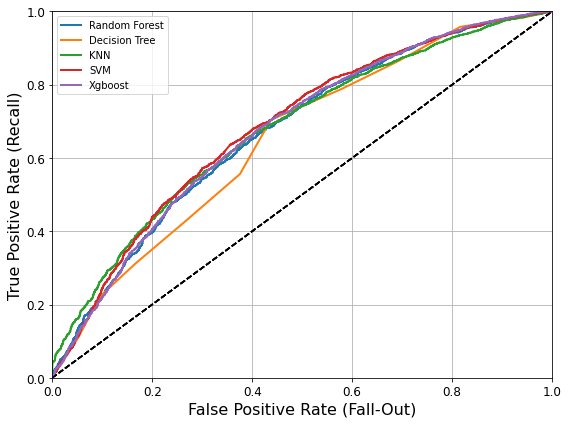

In [ ]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plot_roc_curve(fpr_tree, tpr_tree, "Decision Tree")
plot_roc_curve(fpr_knn, tpr_knn, "KNN")
plot_roc_curve(fpr_svm, tpr_svm, "SVM")
plot_roc_curve(fpr_xgb, tpr_xgb, "Xgboost")

plt.legend()
save_fig("roc_curve_comparison_plot")
plt.show()